# Generative Adversarial Networks in Tensorflow

[Prashant Brahmbhatt](https://www.github.com/hashbanger)

_____

In [74]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt

In [75]:
print(tf.__version__)

1.10.0


## Importing the data

In [76]:
from tensorflow.examples.tutorials.mnist import input_data  
mnist = input_data.read_data_sets('MNIST_data/', one_hot = True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


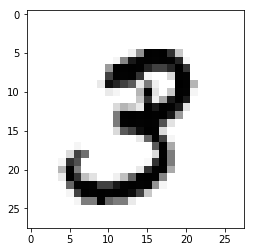

In [77]:
plt.imshow(mnist.train.images[1].reshape(28, 28), cmap = 'Greys')

## The Network

Here the activation function that we will use is what's called as the ***Leaky Rectified Linear Unit*** or ***Leaky Relu***

#### Leaky Relu  
It is an attempt to solve the dying ReLU problem. The ReLU function suffers from what is called the “dying ReLU” problem. Since the slope of the ReLU function on the negative side is zero, a neuron stuck on that side is unlikely to recover from it. This causes the neuron to output zero for every input, thus rendering it useless. A solution to this problem is to use Leaky ReLU which has a small slope on the negative side. The leak helps to increase the range of the ReLU function. Usually, the value of a is 0.01 or so.  
When a is not 0.01 then it is called Randomized ReLU.  
Therefore the range of the Leaky ReLU is (-infinity to infinity).  
Both Leaky and Randomized ReLU functions are monotonic in nature. Also, their derivatives also monotonic in nature.

![img](leaky_relu.jpeg)

### The Generator and Discriminator

In [78]:
def generator(z, reuse = None):
    with tf.variable_scope('gen', reuse = reuse):
        hidden1 = tf.layers.dense(inputs = z, units = 128)
        #Leaky Relu
        alpha = 0.01
        hidden1 = tf.maximum(alpha * hidden1, hidden1)
        
        hidden2 = tf.layers.dense(inputs = hidden1, units = 128)
        hidden2 = tf.maximum(alpha * hidden2, hidden2)
        
        output = tf.layers.dense(hidden2, units = 784, activation = tf.nn.tanh)
        
        return output

In [87]:
def discriminator(X, reuse = None):
    with tf.variable_scope('dis', reuse = reuse):
        hidden1 = tf.layers.dense(inputs = X, units = 128)
        alpha = 0.01
        hidden1 = tf.maximum(alpha * hidden1, hidden1)
        
        hidden2 = tf.layers.dense(inputs = hidden1, units = 128)
        hidden2 = tf.maximum(alpha * hidden2, hidden2)
        
        logits = tf.layers.dense(hidden2, units = 1)
        output = tf.sigmoid(logits)
        return output, logits

### Placeholders

In [88]:
real_images = tf.placeholder(tf.float32, shape = [None, 784])
z = tf.placeholder(tf.float32, shape = [None, 100])

### Generator

In [93]:
G = generator(z)

ValueError: Variable gen/dense/kernel already exists, disallowed. Did you mean to set reuse=True or reuse=tf.AUTO_REUSE in VarScope? Originally defined at:

  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 1717, in __init__
    self._traceback = tf_stack.extract_stack()
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 3155, in create_op
    op_def=op_def)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\util\deprecation.py", line 454, in new_func
    return func(*args, **kwargs)


### Discriminator

In [94]:
D_output_real, D_logits_real = discriminator(real_images)
D_output_fake, D_logits_real = discriminator(G, reuse = True)

ValueError: Variable dis/dense/kernel already exists, disallowed. Did you mean to set reuse=True or reuse=tf.AUTO_REUSE in VarScope? Originally defined at:

  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 1717, in __init__
    self._traceback = tf_stack.extract_stack()
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 3155, in create_op
    op_def=op_def)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\util\deprecation.py", line 454, in new_func
    return func(*args, **kwargs)
